In [1]:
import pandas as pd
import numpy as np
# Ruta del archivo CSV
ruta_csv = r'C:\\Users\\USER\OneDrive\\Escritorio\\Maestría\\mi_proyecto_ml\\src\\House_Rent_Dataset.csv'

# Leer el archivo CSV
try:
    data = pd.read_csv(ruta_csv)
    # Mostrar las primeras filas del dataset
    print(data.head())
except FileNotFoundError:
    print("El archivo no se encuentra en la ruta especificada. Por favor, verifica la ruta y el nombre del archivo.")

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [2]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


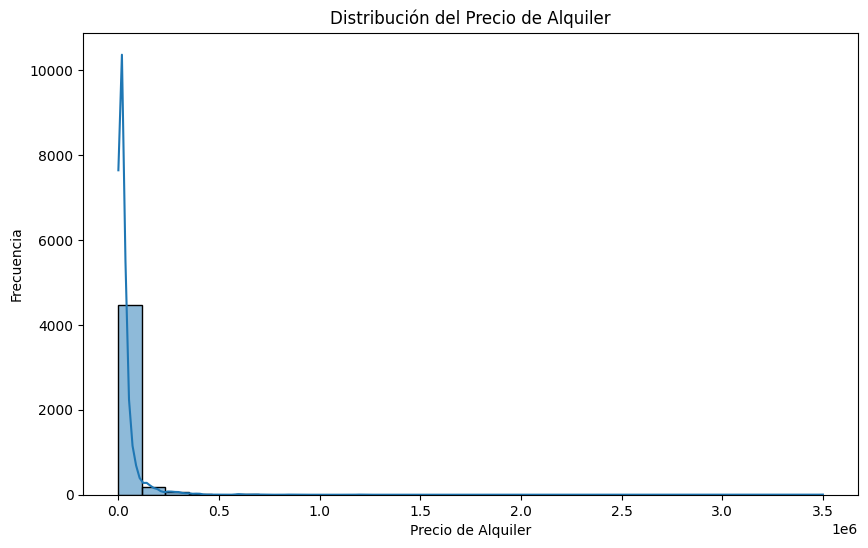

In [4]:
# Información general del dataset
#print(data.info())

# Estadísticas descriptivas
#print(data.describe())

# Visualización de algunas características
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución del precio de alquiler
plt.figure(figsize=(10, 6))
sns.histplot(data['Rent'], bins=30, kde=True)
plt.title('Distribución del Precio de Alquiler')
plt.xlabel('Precio de Alquiler')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
data.shape

(4746, 12)

In [6]:
# Manejo de valores nulos
data = data.dropna()
data = data.drop(columns=['Posted On'])


# Quitar el 2% superior e inferior en relación con la variable 'Rent'
lower_bound = data['Rent'].quantile(0.02)
upper_bound = data['Rent'].quantile(0.98)

data_filtered = data[(data['Rent'] > lower_bound) & (data['Rent'] < upper_bound)]

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = data.select_dtypes(include=['object']).columns
# Aplicar Label Encoding a cada columna categórica
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("Columnas transformadas:", categorical_cols)


Columnas transformadas: Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')


In [8]:
data['Rent'] = np.log1p(data['Rent'])
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,9.210440,1100,455,2,221,4,2,1,2,2
1,2,9.903538,800,14,2,1527,4,1,1,1,2
2,2,9.741027,1000,14,2,1760,4,1,1,1,2
3,2,9.210440,800,10,2,526,4,2,1,1,2
4,2,8.922792,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,9.615872,1000,271,1,219,3,1,1,2,2
4742,3,10.275086,2000,16,2,1214,3,1,1,3,2
4743,3,10.463132,1750,271,1,724,3,1,1,3,0
4744,3,10.714440,1500,226,1,590,3,1,2,2,0


In [9]:
X = data.drop(columns=['Rent'])
y = data['Rent'] 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 80% de entrenamiento se divide en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

###fdf"

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/100
190/190 [==============================] - 1s 4ms/step - loss: 17.5732 - mae: 2.5055 - val_loss: 7.4066 - val_mae: 1.3195
Epoch 2/100
190/190 [==============================] - 1s 3ms/step - loss: 8.1128 - mae: 1.4978 - val_loss: 7.1126 - val_mae: 1.6540
Epoch 3/100
190/190 [==============================] - 1s 3ms/step - loss: 6.2087 - mae: 1.2979 - val_loss: 5.5002 - val_mae: 1.3556
Epoch 4/100
190/190 [==============================] - 1s 3ms/step - loss: 5.1171 - mae: 1.1792 - val_loss: 4.8670 - val_mae: 1.3843
Epoch 5/100
190/190 [==============================] - 1s 3ms/step - loss: 4.2686 - mae: 1.0629 - val_loss: 3.1876 - val_mae: 0.8183
Epoch 6/100
190/190 [==============================] - 1s 3ms/step - loss: 3.6673 - mae: 0.9907 - val_loss: 3.1569 - val_mae: 0.9769
Epoch 7/100
190/190 [==============================] - 1s 3ms/step - loss: 3.0805 - mae: 0.8954 - val_loss: 1.9408 - val_mae: 0.3877
Epoch 8/100
190/190 [==============================] - 1s 3ms/step -

In [22]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, MAE: {mae}, RMSE: {np.sqrt(loss)}, MAPE: {mae*100}, R2: {1 - loss}')

30/30 [==============================] - 0s 3ms/step - loss: 0.2660 - mae: 0.3288
Loss: 0.26599717140197754, MAE: 0.32878315448760986, RMSE: 0.5157491361136513, MAPE: 32.878315448760986, R2: 0.7340028285980225


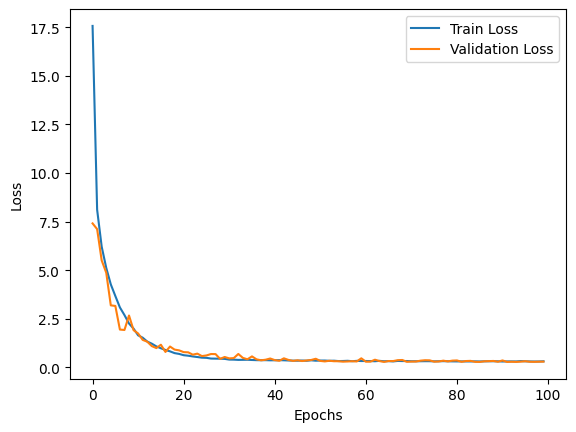

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
predictions = model.predict(X_test)
print(predictions[:10])

30/30 [==============================] - 0s 739us/step
[[ 9.529545]
 [ 9.598906]
 [10.088856]
 [ 9.914682]
 [11.038408]
 [ 9.94269 ]
 [10.822016]
 [ 9.49152 ]
 [11.69883 ]
 [ 9.45673 ]]


In [19]:
df_results = pd.DataFrame({'Real': y_test[:10].values, 'Predicción': predictions[:10].flatten()})
print(df_results)


        Real  Predicción
0   9.680406    9.529545
1   9.392745    9.598906
2  10.239996   10.088856
3   8.987322    9.914682
4  10.736418   11.038408
5   9.741027    9.942690
6  10.950824   10.822016
7   9.159152    9.491520
8  12.899222   11.698830
9   9.615872    9.456730


In [20]:
nueva_propiedad = np.array([[3, 1200, 5, 1, 3, 2, 53, 2, 2, 1]])  # Asegúrate de usar el mismo preprocesamiento que X_train
prediccion = model.predict(nueva_propiedad)

print(f"La renta estimada es: {prediccion[0][0]}")


1/1 [==============================] - 0s 43ms/step
La renta estimada es: 169.77403259277344
